In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [22]:
base = pd.read_csv("DADOS/Eleicao.csv",sep=";")
base.head(10)

,CANDIDATO,SITUACAO,DESPESAS
0,George Turner,0,10
1,Victor Johnson,0,100
2,Jerry Perry,1,1600
3,Shirley Cook,1,1500
4,Carolyn Bailey,1,3300
5,Susan Sanders,0,200
6,Anthony Harris,1,1800
7,Philip Richardson,1,1700
8,Eugene Phillips,0,300
9,Mildred Morris,1,1800


,SITUACAO,DESPESAS
count,47.000000,47.000000
mean,0.510638,1085.744681
std,0.505291,870.968338
min,0.000000,10.000000
25%,0.000000,300.000000
50%,1.000000,800.000000
75%,1.000000,1700.000000
max,1.000000,3300.000000


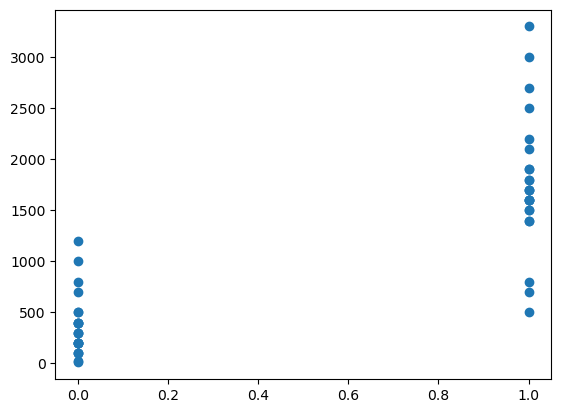

In [24]:
plt.scatter(base.SITUACAO,base.DESPESAS)
base.describe()

In [30]:
np.corrcoef(base.DESPESAS,base.SITUACAO)

array([[1.        , 0.81218717],
       [0.81218717, 1.        ]])

In [32]:
x = base.iloc[:,2].values
x = x[:, np.newaxis]

y = base.iloc[:,1].values
x

array([[  10],
       [ 100],
       [1600],
       [1500],
       [3300],
       [ 200],
       [1800],
       [1700],
       [ 300],
       [1800],
       [ 100],
       [ 500],
       [3000],
       [  20],
       [ 200],
       [ 700],
       [1600],
       [1900],
       [ 100],
       [ 400],
       [2700],
       [ 200],
       [ 300],
       [ 500],
       [2500],
       [1400],
       [ 700],
       [1700],
       [1400],
       [1600],
       [ 400],
       [ 200],
       [1600],
       [2200],
       [1900],
       [ 200],
       [1200],
       [1700],
       [1500],
       [2100],
       [ 400],
       [ 800],
       [ 400],
       [ 500],
       [1000],
       [ 300],
       [ 800]], dtype=int64)

In [34]:
y

array([0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1], dtype=int64)

In [38]:
modelo = LogisticRegression()
modelo.fit(x,y)
modelo.coef_


array([[0.00498364]])

In [40]:
modelo.intercept_

array([-4.60287217])

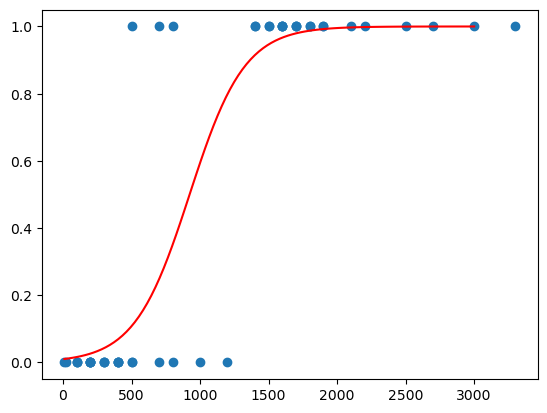

In [68]:
plt.scatter(x,y)

x_teste = np.linspace(10,3000,100)

def model(x):
    return 1/(1 + np.exp(-x))

r = model(x_teste * modelo.coef_ + modelo.intercept_).ravel()
plt.plot(x_teste, r, color="RED")

In [54]:
base2 = pd.read_csv("DADOS/NovosCandidatos.csv", sep=";")
base2

,CANDIDATO,DESPESAS
0,A,0
1,B,10
2,C,200
3,D,500
4,E,900
5,F,1500
6,G,3000


In [56]:
despesas = base2.iloc[:,1].values
despesas = despesas.reshape(-1,1)

teste = modelo.predict(despesas)
teste

array([0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [58]:
base2 = np.column_stack((base2, teste))
base2

array([['A', 0, 0],
       ['B', 10, 0],
       ['C', 200, 0],
       ['D', 500, 0],
       ['E', 900, 0],
       ['F', 1500, 1],
       ['G', 3000, 1]], dtype=object)